In [0]:
embed_size = 300 
max_features = 50000 
maxlen = 100 # 

S_DROPOUT = 0.4
DROPOUT = 0.1

**TEST GPU**

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()
#'/device:GPU:0'

'/device:GPU:0'

In [3]:
import os
import time
import numpy as np 
import pandas as pd 
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics
import gc

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.metrics import f1_score

Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import operator
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from yellowbrick.text import TSNEVisualizer
%matplotlib inline
pd.options.display.max_rows=999
pd.set_option('display.max_columns', 500)
pd.options.display.max_colwidth=1000

In [0]:
import gc

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [0]:
# Tf-Idf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion
from scipy.sparse import hstack, csr_matrix
from keras.preprocessing import text, sequence

In [0]:
#Modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
!ls "/content/drive/My Drive"

'Colab Notebooks'   extra	      submission_Apr29.csv   train.csv
 embeddings	    NLP_hemin.ipynb   test.csv


In [10]:
train_df = pd.read_csv("drive/My Drive/train.csv")
given_test_df = pd.read_csv("drive/My Drive/test.csv")
print("Train shape : ",train_df.shape)
print("Test shape : ",given_test_df.shape) #useless

Train shape :  (1306122, 3)
Test shape :  (375806, 2)


In [12]:
train_df[train_df.target==1].head(20)

,qid,question_text,target
22,0000e91571b60c2fb487,Has the United States become the largest dictatorship in the world?,1
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents? Dark skin babies or light skin babies?,1
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?,1
114,00052793eaa287aff1e1,"I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?",1
115,000537213b01fd77b58a,Which races have the smallest penis?,1
119,00056d45a1ce63856fc6,Why do females find penises ugly?,1
127,0005de07b07a17046e27,How do I marry an American woman for a Green Card? How much do they charge?,1
144,00068875d7c82a5bcf88,"Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",1
156,0006ffd99a6599ff35b3,Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?,1
167,00075f7061837807c69f,In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually restricted the ability of states to make their own laws?,1


We can see here that the data isn't very seperable by traditional means. A non-parametric model will most likely do the best (Gradient Boosting or Neural Networks)

**EDA on training corpus**

In [13]:
lens = train_df.question_text.str.len()
lens.mean(), lens.std(), lens.max()

(70.67883551459971, 38.78427671665139, 1017)

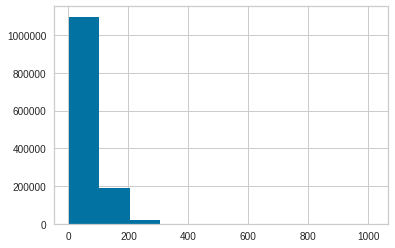

In [14]:
lens.hist()

In [15]:
label_cols = ['target']
train_df['none'] = 1-train_df[label_cols].max(axis=1)
train_df.describe()

,target,none
count,1.306122e+06,1.306122e+06
mean,6.187018e-02,9.381298e-01
std,2.409197e-01,2.409197e-01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+00
50%,0.000000e+00,1.000000e+00
75%,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00


**Wordcloud for sincere questions**

In [0]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  


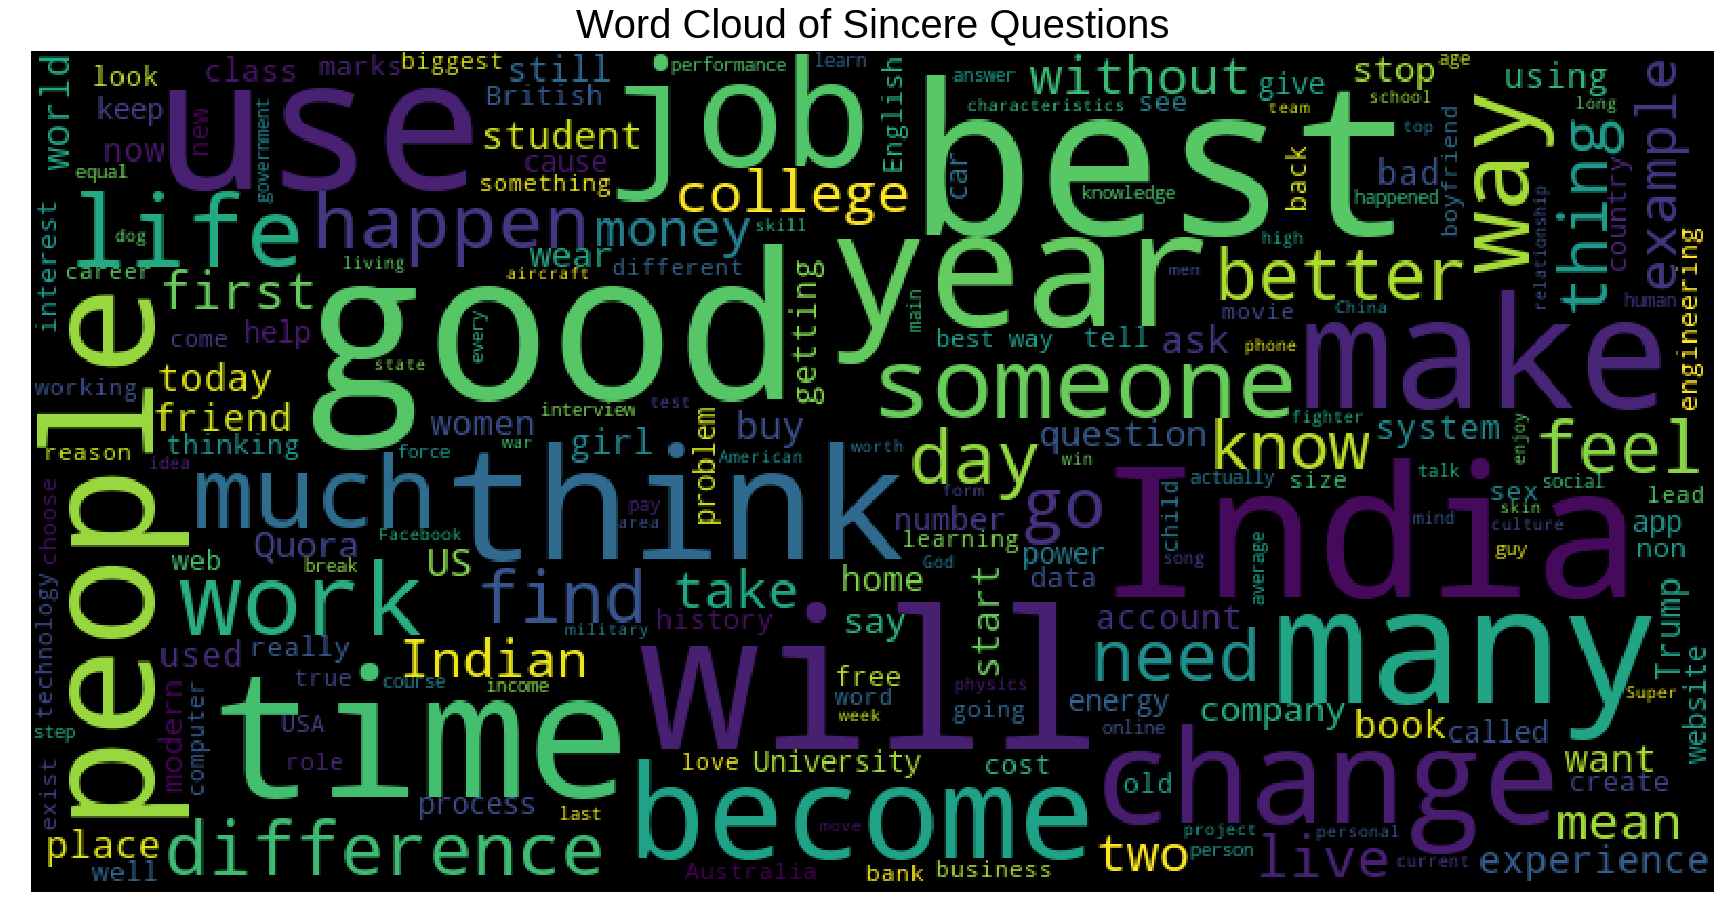

In [17]:
plot_wordcloud(train_df[train_df.target == 0]["question_text"], title="Word Cloud of Sincere Questions")


**Wordcloud for In-sincere questions**

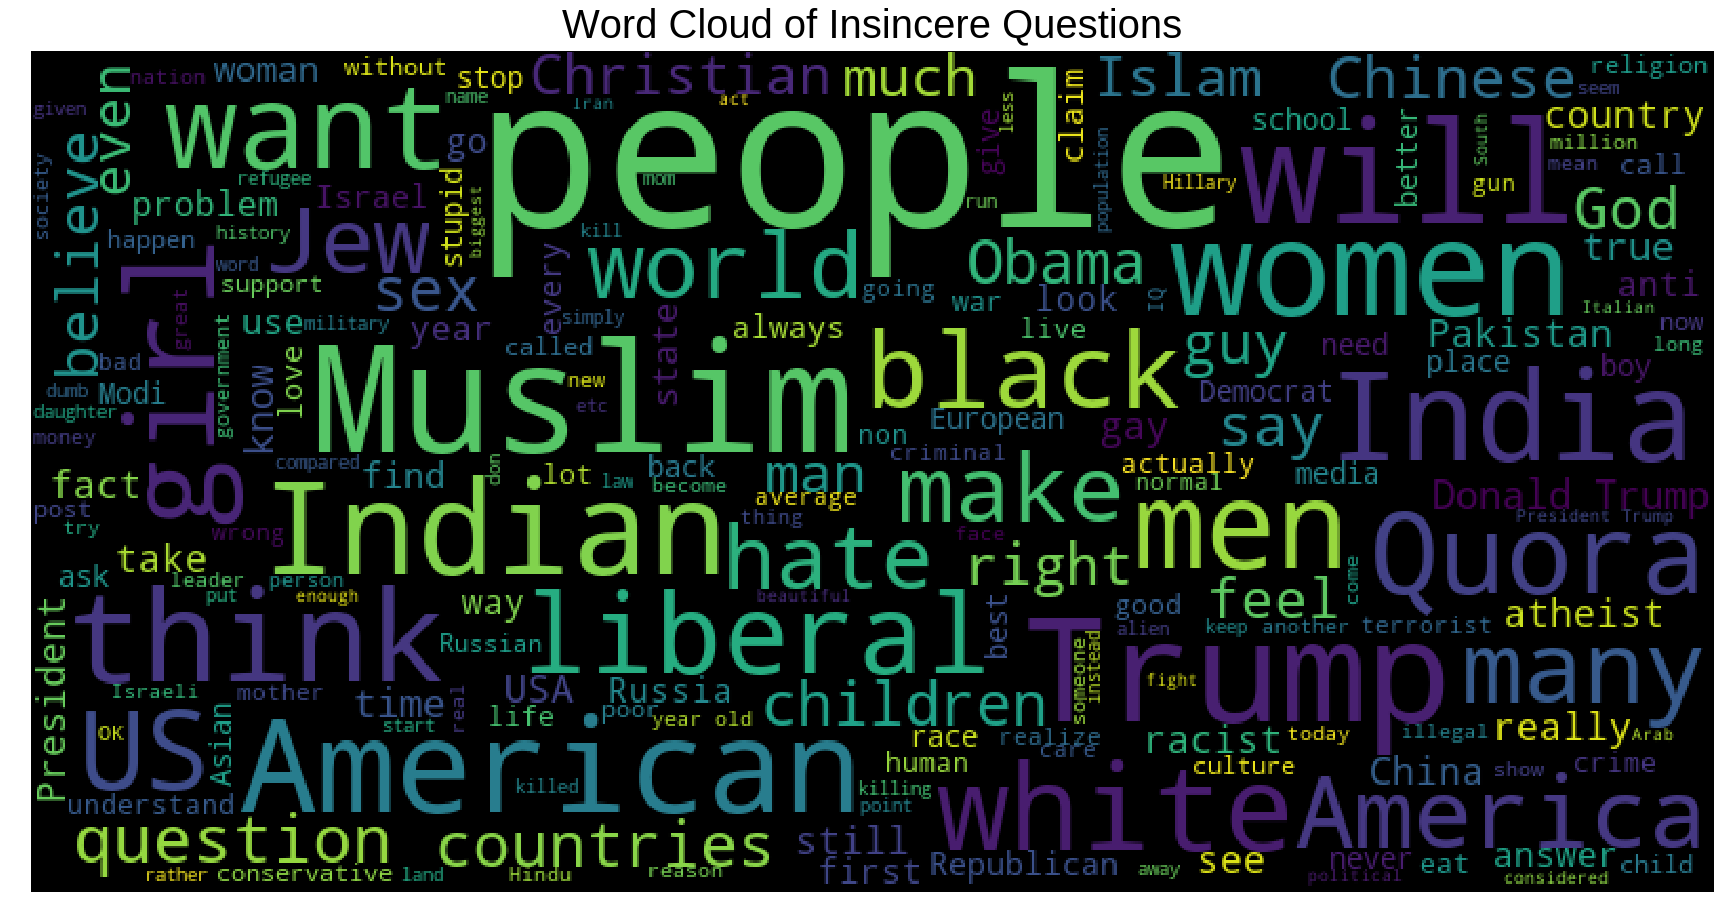

In [18]:
plot_wordcloud(train_df[train_df.target == 1]["question_text"], title="Word Cloud of Insincere Questions")


**Word frequency and n-gram frequency**

In [0]:
stopwords = set(STOPWORDS)

In [0]:
sincere_words = train_df[train_df.target==0].question_text.apply(lambda x: x.lower().split()).tolist()
insincere_words = train_df[train_df.target==1].question_text.apply(lambda x: x.lower().split()).tolist()

sincere_words = [item for sublist in sincere_words for item in sublist if item not in stopwords]
insincere_words = [item for sublist in insincere_words  for item in sublist if item not in stopwords ]

In [21]:
print('Number of sincere words',len(sincere_words))
print('Number of insincere words',len(insincere_words))

Number of sincere words 7743544
Number of insincere words 734398


In [0]:
sincere_words_counter = Counter(sincere_words)
insincere_words_counter = Counter(insincere_words)

Most common sincere words

In [23]:
most_common_sincere_words = sincere_words_counter.most_common()[:10]
most_common_sincere_words = pd.DataFrame(most_common_sincere_words)
most_common_sincere_words.columns = ['word', 'freq']
most_common_sincere_words['percentage'] = most_common_sincere_words.freq *100 / sum(most_common_sincere_words.freq)
most_common_sincere_words

,word,freq,percentage
0,best,60816,19.240759
1,will,45675,14.450501
2,people,37960,12.009656
3,good,34827,11.018448
4,one,28840,9.124301
5,make,25696,8.129613
6,think,21641,6.846706
7,many,20788,6.576837
8,much,20108,6.361701
9,someone,19728,6.241478


Most common insincere words

In [24]:
most_common_insincere_words = insincere_words_counter.most_common()[:10]
most_common_insincere_words = pd.DataFrame(most_common_insincere_words)
most_common_insincere_words.columns = ['word', 'freq']
most_common_insincere_words['percentage'] = most_common_insincere_words.freq *100 / sum(most_common_insincere_words.freq)
most_common_insincere_words

,word,freq,percentage
0,people,11041,24.570500
1,trump,4893,10.888820
2,women,4760,10.592843
3,will,4592,10.218978
4,think,3774,8.398611
5,many,3552,7.904575
6,white,3354,7.463949
7,men,3152,7.014421
8,indian,2986,6.645006
9,muslims,2832,6.302297


Most common sincere n-grams

In [0]:
def generate_ngrams(words, n):
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [26]:
n = 3
sincere_ngram_counter = Counter(generate_ngrams(sincere_words, n))
insincere_ngram_counter = Counter(generate_ngrams(insincere_words, n))
most_common_sincere_ngram = sincere_ngram_counter.most_common()[:10]
most_common_sincere_ngram = pd.DataFrame(most_common_sincere_ngram)
most_common_sincere_ngram.columns = ['word', 'freq']
most_common_sincere_ngram['percentage'] = most_common_sincere_ngram.freq *100 / sum(most_common_sincere_ngram.freq)
most_common_sincere_ngram

,word,freq,percentage
0,tips someone starting,716,12.402564
1,useful tips someone,713,12.350598
2,someone starting work,713,12.350598
3,advice give someone,640,11.086090
4,give someone moving,519,8.990126
5,good hotels short-term,519,8.990126
6,hotels short-term business,519,8.990126
7,short-term business travelers,519,8.990126
8,good bad neighborhoods,515,8.920838
9,best known for?,400,6.928807


Most common insincere n-grams

In [27]:
most_common_insincere_ngram = insincere_ngram_counter.most_common()[:10]
most_common_insincere_ngram = pd.DataFrame(most_common_insincere_ngram)
most_common_insincere_ngram.columns = ['word', 'freq']
most_common_insincere_ngram['percentage'] = most_common_insincere_ngram.freq *100 / sum(most_common_insincere_ngram.freq)
most_common_insincere_ngram

,word,freq,percentage
0,will donald trump,43,12.250712
1,black lives matter,42,11.965812
2,long will take,38,10.826211
3,kim jong un,36,10.256410
4,12 year old,35,9.971510
5,14 year old,33,9.401709
6,people still believe,33,9.401709
7,united states america,31,8.831909
8,think donald trump,30,8.547009
9,ask stupid questions,30,8.547009


# **Data pre processing**

In [0]:
import re
def clean_text(x):

    x = str(x)
    x = re.sub('[0-9]{5,}', '#####', x)
    x = re.sub('[0-9]{4}', '####', x)
    x = re.sub('[0-9]{3}', '###', x)
    x = re.sub('[0-9]{2}', '##', x)
    for punct in '?!.':
        x = x.replace(punct, ' EOS ')
    for punct in "/-'":
        x = x.replace(punct, ' ')
    for punct in '&':
        x = x.replace(punct, ' ' + punct+' ')
    for punct in ',"#$%\'()*+-/:;<=>@[\\]^_`{|}~' + '“”’':
        x = x.replace(punct, '')
    
    return x

In [0]:
train_df["question_text"]= train_df["question_text"].apply(lambda x: clean_text(x))

In [0]:
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=2018)
train_df, test_df = train_test_split(train_df, test_size=float(1.0/8), random_state=2018)
train_X = train_df["question_text"].fillna("_na_").values
val_X = val_df["question_text"].fillna("_na_").values
test_X = test_df["question_text"].fillna("_na_").values
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_X))
train_X = tokenizer.texts_to_sequences(train_X)
val_X = tokenizer.texts_to_sequences(val_X)
train_X = pad_sequences(train_X, maxlen=maxlen)
val_X = pad_sequences(val_X, maxlen=maxlen)
test_X = pad_sequences(test_X, maxlen=maxlen)
train_y = train_df['target'].values
val_y = val_df['target'].values
test_y = test_df['target'].values

**TF-IDF**

In [0]:
all_text = pd.concat([train_df['question_text'],test_df['question_text']], axis =0)

word_vect = TfidfVectorizer(
            sublinear_tf=True,
            strip_accents='unicode',
            analyzer='word',
            token_pattern=r'\w{1,}',
            stop_words='english',
            ngram_range=(1, 2),
            max_features=20000)
word_vect.fit(all_text)
X_tf  = word_vect.transform(train_df['question_text'])
testing  = word_vect.transform(test_df['question_text'])

In [0]:
y_tf = train_df['target'].copy()

In [0]:
target_names = ["Sincere","Insincere"]

**t-SNE - Visual Cluster Plot**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


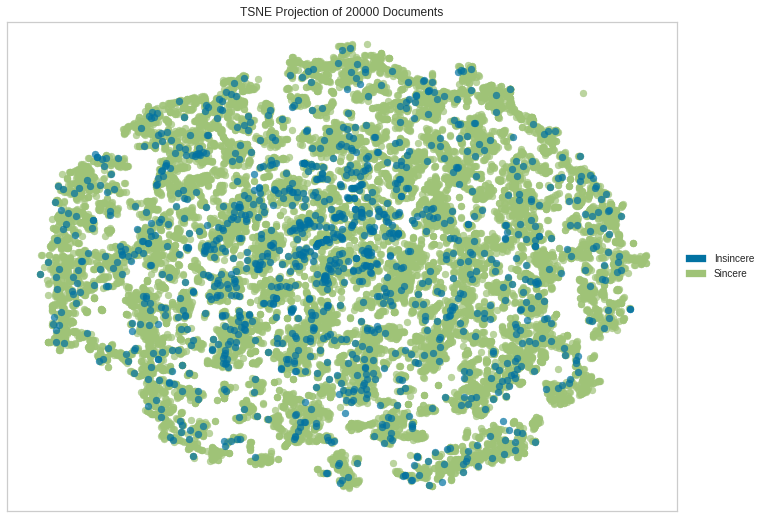

In [36]:
# Create the visualizer and draw the vectors
plt.figure(figsize = [15,9])
tsne = TSNEVisualizer()
n = 20000
tsne.fit(train_X[:n], train_df.target[:n].map({1: target_names[1],0:target_names[0]}))
tsne.poof()

**Glove Embeddings:**

In [0]:
EMBEDDING_FILE = 'drive/My Drive/embeddings/glove.840B.300d/glove.840B.300d.txt'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix_1 = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix_1[i] = embedding_vector

del embeddings_index; gc.collect() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


22

**Wiki News FastText Embeddings:**

In [0]:
EMBEDDING_FILE = 'drive/My Drive/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if len(o)>100)

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix_2 = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix_2[i] = embedding_vector
        
del embeddings_index; gc.collect()         

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


22

**Paragram Embeddings:**

In [0]:
EMBEDDING_FILE = 'drive/My Drive/embeddings/paragram_300_sl999/paragram_300_sl999.txt'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE, encoding="utf8", errors='ignore') if len(o)>100)

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix_3 = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix_3[i] = embedding_vector

del embeddings_index; gc.collect()         

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


22

**Word2vec Embeddings:**

In [0]:
from gensim.models import KeyedVectors

EMBEDDING_FILE = 'drive/My Drive/embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin'
embeddings_index = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix_4 = (np.random.rand(nb_words, embed_size) - 0.5) / 5.0
for word, i in word_index.items():
    if i >= max_features: continue
    if word in embeddings_index:
        embedding_vector = embeddings_index.get_vector(word)
        embedding_matrix_4[i] = embedding_vector
        
del embeddings_index; gc.collect() 

0

**Combine :**

In [0]:
embedding_matrix = np.concatenate((embedding_matrix_1, embedding_matrix_2, embedding_matrix_3, embedding_matrix_4), axis=1)  
np.shape(embedding_matrix)

(50000, 1200)

**Logistic Regression**

In [0]:
def logistic_model_fit(logistic_model,X_train,X_val,y_train,y_val):
    logistic_model.fit(X_train, y_train)
    
    # Predict
    valid_logistic_pred = logistic_model.predict(X_val)
    train_logistic_pred = logistic_model.predict(X_train)
    
    print("Train Set F1 Score: {:.3f}".format(metrics.f1_score(train_logistic_pred, y_train)))
    print("Validation Set F1 Score: {:.3f}".format(metrics.f1_score(valid_logistic_pred, y_val)))

    # Confusion Matrix
    C = metrics.confusion_matrix(valid_logistic_pred, y_val)/len(y_val)
    sns.heatmap(C, annot=True)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train Set F1 Score: 0.009
Validation Set F1 Score: 0.009


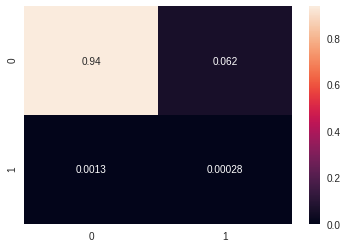

In [38]:
# Fit Model
logistic_model_fit(LogisticRegression(solver = 'sag'),train_X,val_X,train_y,val_y)

**CNN**

In [0]:
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D

filter_sizes = [1,2,3,5]
num_filters = 36

inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size * 4, weights=[embedding_matrix])(inp)
x = SpatialDropout1D(S_DROPOUT)(x)
x = Reshape((maxlen, embed_size * 4, 1))(x)

maxpool_pool = []
for i in range(len(filter_sizes)):
    conv = Conv2D(num_filters, kernel_size=(filter_sizes[i], embed_size * 4),
                                 kernel_initializer='he_normal', activation='elu')(x)
    maxpool_pool.append(MaxPool2D(pool_size=(maxlen - filter_sizes[i] + 1, 1))(conv))

z = Concatenate(axis=1)(maxpool_pool)   
z = Flatten()(z)
z = Dropout(DROPOUT)(z)

outp = Dense(1, activation="sigmoid")(z)

model_cnn = Model(inputs=inp, outputs=outp)
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model_cnn.fit(train_X, train_y, batch_size=512, epochs=2, validation_data=(val_X, val_y))

Instructions for updating:
Use tf.cast instead.
Train on 914284 samples, validate on 261225 samples
Epoch 1/2
914284/914284 [==============================] - 472s 516us/step - loss: 0.1232 - acc: 0.9530 - val_loss: 0.1048 - val_acc: 0.9583
Epoch 2/2
914284/914284 [==============================] - 462s 506us/step - loss: 0.1005 - acc: 0.9601 - val_loss: 0.1046 - val_acc: 0.9585


In [0]:
pred_val_cnn_y = model_cnn.predict([val_X], batch_size=1024, verbose=1) #validation

261225/261225 [==============================] - 55s 212us/step


In [0]:
pred_test_cnn_y = model_cnn.predict([test_X], batch_size=1024, verbose=1) #test

130613/130613 [==============================] - 28s 212us/step


**Predictions**

In [0]:
pred_train_cnn_y = model_cnn.predict([train_X], batch_size=1024, verbose=1) #train
train_y = train_df['target'].values
pred_train_y =  pred_train_cnn_y 

thresh = .23
res = metrics.f1_score(train_y, (pred_train_y > thresh).astype(int))
print("F1 score_train at threshold {0} is {1}".format(thresh, res)) #train
    

914284/914284 [==============================] - 189s 207us/step
F1 score_train at threshold 0.23 is 0.7332427785149535


In [0]:
#Validation
pred_val_y =  pred_val_cnn_y  

thresholds = []
for thresh in np.arange(0.1, 0.501, 0.01):
    thresh = np.round(thresh, 2)
    res = metrics.f1_score(val_y, (pred_val_y > thresh).astype(int))
    thresholds.append([thresh, res])
    print("F1 score at threshold {0} is {1}".format(thresh, res)) #validation
    
thresholds.sort(key=lambda x: x[1], reverse=True)
best_thresh = thresholds[0][0]
print("Best threshold: ", best_thresh)

F1 score at threshold 0.1 is 0.6176863478493188
F1 score at threshold 0.11 is 0.6259294740203458
F1 score at threshold 0.12 is 0.6332012124038238
F1 score at threshold 0.13 is 0.6388208724592892
F1 score at threshold 0.14 is 0.6430317256733539
F1 score at threshold 0.15 is 0.6467372568332924
F1 score at threshold 0.16 is 0.6503251625812906
F1 score at threshold 0.17 is 0.6533556876492406
F1 score at threshold 0.18 is 0.6556870022423258
F1 score at threshold 0.19 is 0.6574991503490104
F1 score at threshold 0.2 is 0.6592655397170261
F1 score at threshold 0.21 is 0.6602056431045128
F1 score at threshold 0.22 is 0.6618090862129904
F1 score at threshold 0.23 is 0.6621710888472971
F1 score at threshold 0.24 is 0.6628428233328693
F1 score at threshold 0.25 is 0.6632127270167535
F1 score at threshold 0.26 is 0.6627010103885014
F1 score at threshold 0.27 is 0.6631972397929844
F1 score at threshold 0.28 is 0.663200999041617
F1 score at threshold 0.29 is 0.6627944498225233
F1 score at threshold 0

In [0]:
# Test data predictions
test_y = test_df['target'].values
pred_test_y =  pred_test_cnn_y 

thresh = .25
res = metrics.f1_score(test_y, (pred_test_y > thresh).astype(int))
print("F1 score_test at threshold {0} is {1}".format(thresh, res)) #test
    

F1 score_test at threshold 0.25 is 0.6592970521541951


In [0]:
# Test accuracy CNN
# evaluate the model
	scores = model_cnn.evaluate(test_X, test_y, verbose=0)
	print("%s: %.2f%%" % (model_cnn.metrics_names[1], scores[1]*100))


acc: 95.82%


In [0]:
pred_test_y = (pred_test_y > best_thresh).astype(int)
out_df = pd.DataFrame({"qid":test_df["qid"].values})
out_df['prediction'] = pred_test_y
out_df.to_csv("drive/My Drive/submission_Apr29.csv", index=False)

In [0]:
out_df.head()

,qid,prediction
0,6b6bb83cc6e7a3eabef2,0
1,ad74a0acab984c050fa8,0
2,164437e082b6fc7c63ab,1
3,5cdf1a0477b440c53a76,0
4,7fd964b013043abb8791,0


In [0]:
#out_df.to_csv("drive/My Drive/submission.csv", index=False)

**LSTM**

In [0]:
np.shape(embedding_matrix)

(50000, 1200)

In [0]:
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Bidirectional
import keras.backend as K

In [0]:
#Build LSTM Network model
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 96, input_length=maxlen))
model_lstm.add(Bidirectional(CuDNNLSTM(96)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(4, activation='relu'))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fit the model
model_lstm.fit(train_X, train_y, validation_split= 0.2, epochs=2, batch_size=256)

Train on 731427 samples, validate on 182857 samples
Epoch 1/2
731427/731427 [==============================] - 71s 98us/step - loss: 0.1570 - acc: 0.9509 - val_loss: 0.1150 - val_acc: 0.9549
Epoch 2/2
731427/731427 [==============================] - 70s 96us/step - loss: 0.1128 - acc: 0.9571 - val_loss: 0.1137 - val_acc: 0.9551


In [0]:
# #Calculate F1 score on Train data
# train_pred_prob_lstm = model_lstm.predict(train_X)
# train_pred_01_lstm = np.where(train_pred_prob_lstm>0.27,1,0)
# train_pred_01_lstm = [int(item) for item in train_pred_01_lstm]
# f1_quora_train  = f1_score(train_y, train_pred_01_lstm)
# print('Train F1 score LSTM:', f1_quora_train)

In [0]:
# # Test accuracy
# # evaluate the model
# 	scores = model_lstm.evaluate(test_X, test_y, verbose=0)
# 	print("%s: %.2f%%" % (model_lstm.metrics_names[1], scores[1]*100))


In [0]:
# Evaluation of the model on validation set !
valid_pred_prob_lstm = model_lstm.predict(val_X)

In [0]:
valid_pred_01_lstm = np.where(valid_pred_prob_lstm>0.27,1,0)
valid_pred_01_lstm = [int(item) for item in valid_pred_01_lstm]

In [0]:
#Calculate F1 score on validation data
f1_quora  = f1_score(val_y, valid_pred_01_lstm)
print('Validation F1 score LSTM:', f1_quora)

Validation F1 score LSTM: 0.6397645108742248


In [0]:
# #Calculate F1 score on Test data
# test_pred_prob_lstm = model_lstm.predict(test_X)
# test_pred_01_lstm = np.where(test_pred_prob_lstm>0.27,1,0)
# test_pred_01_lstm = [int(item) for item in test_pred_01_lstm]
# f1_quora  = f1_score(test_y, test_pred_01_lstm)
# print('Test F1 score LSTM:', f1_quora)

In [0]:
# Final evaluation of the ensemble on test !!
test_pred_prob_lstm = model_lstm.predict(test_X)
test_pred_01_lstm = np.where(test_pred_prob_lstm>0.27,1,0)
test_pred_01_lstm = [int(item) for item in test_pred_01_lstm]

In [0]:
#Write to dataframe
submit_df = pd.DataFrame({'qid':test_df['qid'].values, 'prediction': test_pred_01_lstm})
submit_df.to_csv("submission.csv", index=False)

In [0]:
submit_df.head()

,qid,prediction
0,6b6bb83cc6e7a3eabef2,0
1,ad74a0acab984c050fa8,0
2,164437e082b6fc7c63ab,1
3,5cdf1a0477b440c53a76,0
4,7fd964b013043abb8791,1


In [0]:
submit_df[submit_df.prediction==1].head(20)

,qid,prediction
2,164437e082b6fc7c63ab,1
4,7fd964b013043abb8791,1
18,8bcdbc70dd4d9755cfb4,1
29,dae2647c7d0d1c7dfc5c,1
43,c50e54ca7da31ab8064b,1
53,75b4caba0d010d8ae168,1
61,c237785570fe72077274,1
65,bbd6128224b08adf3483,1
68,242957c66630d004aa94,1
69,b7e66724d1c7ed16ab70,1


In [0]:
#Write to dataframe
submit_df = pd.DataFrame({'qid':test_df['qid'].values, 'prediction': test_pred_01_lstm})
submit_df.to_csv("drive/My Drive/submission_Apr29.csv", index=False)

In [0]:
submit_df.prediction.value_counts()

0    121292
1      9321
Name: prediction, dtype: int64